# Parte 2

## A)

In [85]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sympy as sp
from sklearn.tree import DecisionTreeRegressor as Tree
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Read data
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')

ntrain = dftrain.shape[0]
nval = dftrain.shape[0] + dfval.shape[0]

df = pd.concat([dftrain,dfval,dftest])
print ('\nSummary - dataframe completo:\n')
print (df.describe())
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])


Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159    

Antes de analizar los atributos del problema, se analizará la distribución de los valores de la variable objetivo, que en este caso corresponde a *count*.

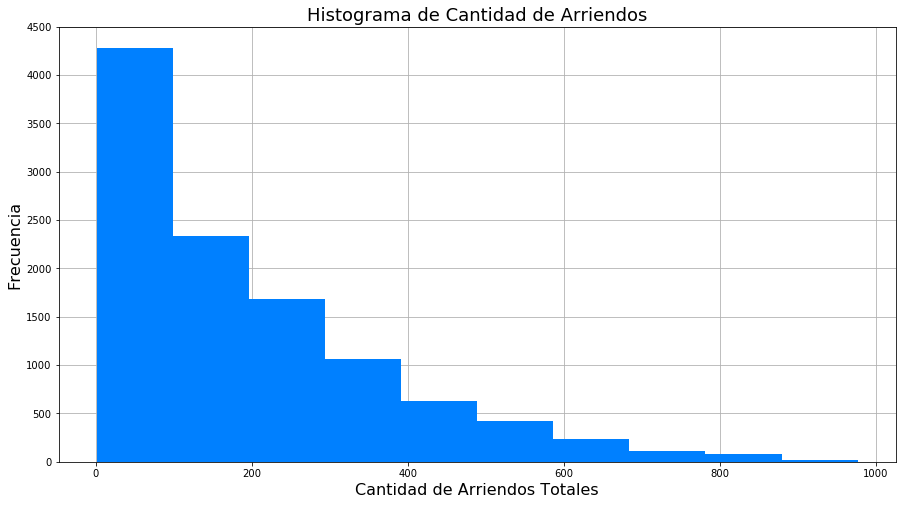

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title("Histograma de Cantidad de Arriendos", fontsize=18)
plt.xlabel("Cantidad de Arriendos Totales", fontsize=16)
plt.ylabel("Frecuencia", fontsize=16)
plt.hist(df['count'], color=(0,0.5,1))
plt.grid(True)
ax.set_axisbelow(True)
plt.show()

Se nota una tendencia a intancias de arriendo más pequeñas (0-200 arriendos), lo cual puede causar un sesgo en los datos al intentar entrenar una máquina.

A continuación, se estudiará la influencia de los atributos sobre la variable objetivo, graficando en función de la hora del día. Se utiliza la hora como atributo fijo dada su influencia obvia sobre los datos. Dependiendo de la hora, existen más arriendos por el ingreso y salida a los trabajos/escuelas.

## Estación del Año

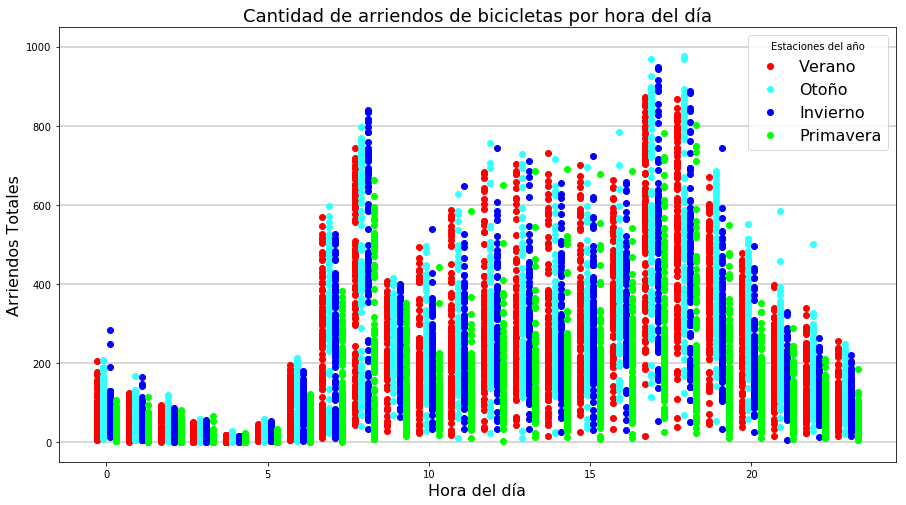

  Categoria  |   Maximo    |   Minimo    | Media Arit. |  Est. Dev.  | Frecuencia  
----------------------------------------------------------------------------------
   Verano    |     873     |      1      |   215.25    |   191.97    |    2733     
    Otoño    |     977     |      1      |   234.42    |   197.11    |    2733     
  Invierno   |     948     |      1      |   198.99    |   177.59    |    2734     
  Primavera  |     801     |      1      |   116.34    |   125.25    |    2686     


In [22]:
plt.figure(figsize=(15, 8))
plt.xlabel("Hora del día", fontsize=16)
plt.ylabel("Arriendos Totales", fontsize=16)
for height in range(0,1200,200):
    plt.axhline(y=height, alpha=0.5, color=(0.6,0.6,0.6))
    
# Bicicletas en el verano
dfsum = df.loc[df['season'] == 2]
plt.plot(dfsum['hour']-0.3, dfsum['count'], 'o', color=(1,0,0), alpha=1, label="Verano")

# Bicicletas en el otoño
dfaut = df.loc[df['season'] == 3]
plt.plot(dfaut['hour']-0.1, dfaut['count'], 'o', color=(0.2,1,1), alpha=1, label="Otoño")

# Bicicletas en el invierno
dfwin = df.loc[df['season'] == 4]
plt.plot(dfwin['hour']+0.1, dfwin['count'], 'o', color=(0,0,1), alpha=1, label="Invierno")

# Bicicletas en el primavera
dfspr = df.loc[df['season'] == 1]
plt.plot(dfspr['hour']+0.3, dfspr['count'], 'o', color=(0,1,0), alpha=1, label="Primavera")

plt.title('Cantidad de arriendos de bicicletas por hora del día', fontsize=18)
plt.legend(fontsize=16, title='Estaciones del año')
plt.show()
print("{:^13}|{:^13}|{:^13}|{:^13}|{:^13}|{:^13}".format("Categoria", "Maximo", "Minimo", "Media Arit.", 
                                                         "Est. Dev.", "Frecuencia"))
print("-"*82)
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Verano", np.max(dfsum['count']), 
                                                             np.min(dfsum['count']), np.mean(dfsum['count']),
                                                             np.std(dfsum['count']), len(dfsum)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Otoño", np.max(dfaut['count']), 
                                                             np.min(dfaut['count']), np.mean(dfaut['count']),
                                                             np.std(dfaut['count']), len(dfaut)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Invierno", np.max(dfwin['count']), 
                                                             np.min(dfwin['count']), np.mean(dfwin['count']),
                                                             np.std(dfwin['count']), len(dfwin)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Primavera", np.max(dfspr['count']), 
                                                             np.min(dfspr['count']), np.mean(dfspr['count']),
                                                             np.std(dfspr['count']), len(dfspr)))

Para este atributo se observa un comportamiento regular para las 4 estaciones del año, sin embargo en primavera se denota una baja en la cantidad de arriendos. Esto resalta de manera más marcada en los datos de la tabla.

## Clima

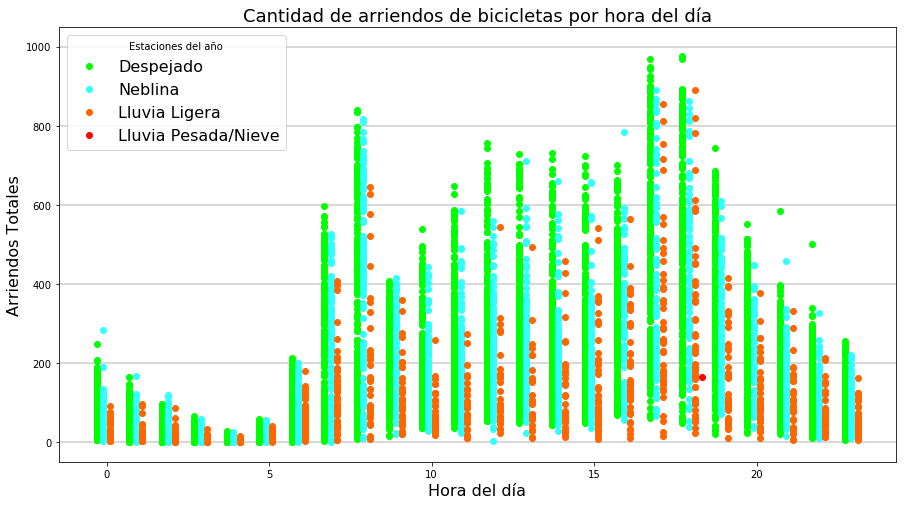

   Categoria    |   Maximo    |   Minimo    | Media Arit. |  Est. Dev.  | Frecuencia  
------------------------------------------------------------------------------------
   Despejado    |     977     |      1      |   205.24    |   187.95    |    7192     
    Neblina     |     890     |      1      |   178.96    |   168.34    |    2834     
   Ll. Ligera   |     891     |      1      |   118.85    |    138.5    |     859     
 Ll. Pes./Nieve |     164     |     164     |    164.0    |     0.0     |      1      


In [23]:
plt.figure(figsize=(15, 8))
plt.xlabel("Hora del día", fontsize=16)
plt.ylabel("Arriendos Totales", fontsize=16)
for height in range(0,1200,200):
    plt.axhline(y=height, alpha=0.5, color=(0.6,0.6,0.6))
    
# Bicicletas en clima despejado
dfclr = df.loc[df['weather'] == 1]
plt.plot(dfclr['hour']-0.3, dfclr['count'], 'o', color=(0,1,0), alpha=1, label="Despejado")

# Bicicletas en clima con neblina
dfmis = df.loc[df['weather'] == 2]
plt.plot(dfmis['hour']-0.1, dfmis['count'], 'o', color=(0.2,1,1), alpha=1, label="Neblina")

# Bicicletas en clima de lluvia ligera
dflrn = df.loc[df['weather'] == 3]
plt.plot(dflrn['hour']+0.1, dflrn['count'], 'o', color=(1,0.4,0), alpha=1, label="Lluvia Ligera")

# Bicicletas en clima de lluvia intensa y nieve
dfhrn = df.loc[df['weather'] == 4]
plt.plot(dfhrn['hour']+0.3, dfhrn['count'], 'o', color=(1,0,0), alpha=1, label="Lluvia Pesada/Nieve")

plt.title('Cantidad de arriendos de bicicletas por hora del día', fontsize=18)
plt.legend(fontsize=16, title='Estaciones del año')
plt.show()

print("{:^16}|{:^13}|{:^13}|{:^13}|{:^13}|{:^13}".format("Categoria", "Maximo", "Minimo", "Media Arit.", 
                                                         "Est. Dev.", "Frecuencia"))
print("-"*84)
print("{:^16}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Despejado", np.max(dfclr['count']), 
                                                             np.min(dfclr['count']), np.mean(dfclr['count']),
                                                             np.std(dfclr['count']), len(dfclr)))
print("{:^16}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Neblina", np.max(dfmis['count']), 
                                                             np.min(dfmis['count']), np.mean(dfmis['count']),
                                                             np.std(dfmis['count']), len(dfmis)))
print("{:^16}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Ll. Ligera", np.max(dflrn['count']), 
                                                             np.min(dflrn['count']), np.mean(dflrn['count']),
                                                             np.std(dflrn['count']), len(dflrn)))
print("{:^16}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Ll. Pes./Nieve", np.max(dfhrn['count']),
                                                             np.min(dfhrn['count']), np.mean(dfhrn['count']),
                                                             np.std(dfhrn['count']), len(dfhrn)))

En este caso, se nota una tendencia a mayor cantidad de arriendo con un clima despejado. Donde con lluvia ligera ya se tiene que la media de arriendo se reduce a casi la mitad.

## Trabajo o No trabajo

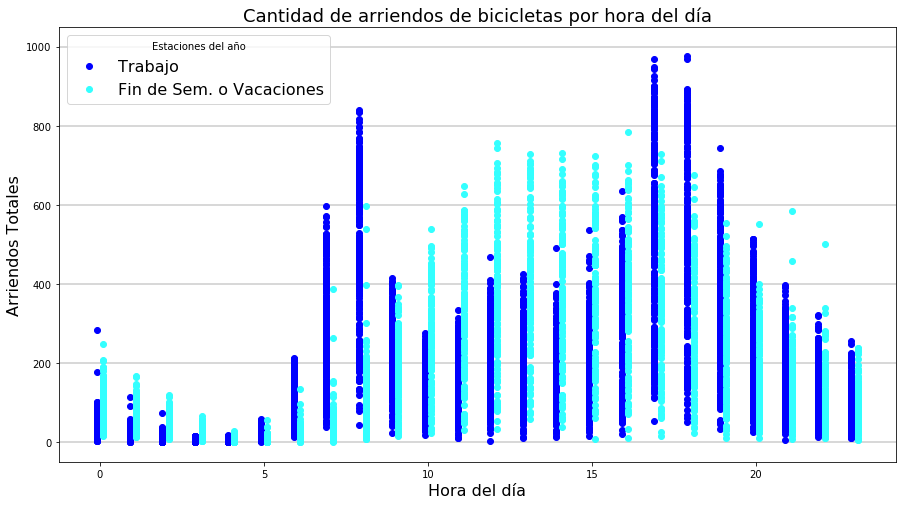

   Categoria    |   Maximo    |   Minimo    | Media Arit. |  Est. Dev.  | Frecuencia  
-------------------------------------------------------------------------------------
    Trabajo     |     977     |      1      |   193.01    |    184.5    |    7412     
 F. Sem./ Vaca. |     783     |      1      |   188.51    |    173.7    |    3474     


In [30]:
plt.figure(figsize=(15, 8))
plt.xlabel("Hora del día", fontsize=16)
plt.ylabel("Arriendos Totales", fontsize=16)
for height in range(0,1200,200):
    plt.axhline(y=height, alpha=0.5, color=(0.6,0.6,0.6))

# Bicicletas en día de trabajo
dftra = df.loc[df['workingday'] == 1]
plt.plot(dftra['hour']-0.1, dftra['count'], 'o', color=(0,0,1), alpha=1, label="Trabajo")

# Bicicletas en fines de semana y vacaciones
dfvac = df.loc[df['workingday'] == 0]
plt.plot(dfvac['hour']+0.1, dfvac['count'], 'o', color=(0.2,1,1), alpha=1, label="Fin de Sem. o Vacaciones")

plt.title('Cantidad de arriendos de bicicletas por hora del día', fontsize=18)
plt.legend(fontsize=16, title='Estaciones del año')
plt.show()

print("{:^16}|{:^13}|{:^13}|{:^13}|{:^13}|{:^13}".format("Categoria", "Maximo", "Minimo", "Media Arit.", 
                                                         "Est. Dev.", "Frecuencia"))
print("-"*85)
print("{:^16}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Trabajo", np.max(dftra['count']), 
                                                             np.min(dftra['count']), np.mean(dftra['count']),
                                                             np.std(dftra['count']), len(dftra)))
print("{:^16}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("F. Sem./ Vaca.", np.max(dfvac['count']), 
                                                             np.min(dfvac['count']), np.mean(dfvac['count']),
                                                             np.std(dfvac['count']), len(dfvac)))

Si bien la media es similar en ambos escenario, por razones obvias en los días de trabajo existen más arriendos alrededor de las 7-8 am y 5-6 pm, y menos en las horas intermedias. Ocurre lo contrario en los días descanso.

## Temperatura

Para el caso de la temperatura se observó que variaba entre 0 y 41 $^\circ$C. 

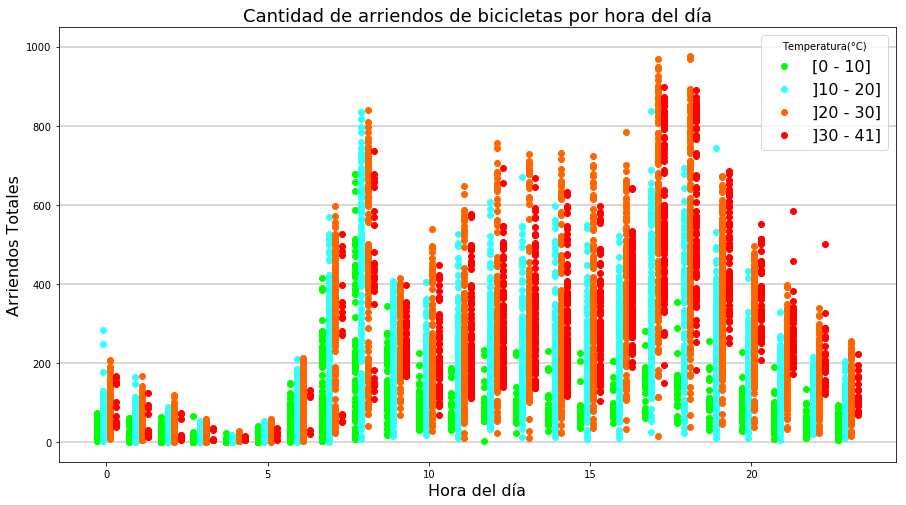

  Categoria  |   Maximo    |   Minimo    | Media Arit. |  Est. Dev.  | Frecuencia  
----------------------------------------------------------------------------------
  [0 - 10]   |     679     |      1      |   73.186    |   91.999    |    1259     
  ]10 - 20]  |     837     |      1      |   150.47    |   145.61    |    4049     
  ]20 - 30]  |     977     |      1      |   223.41    |   195.34    |    4334     
  ]30 - 41]  |     897     |      4      |   334.27    |   181.75    |    1244     


In [25]:
plt.figure(figsize=(15, 8))
plt.xlabel("Hora del día", fontsize=16)
plt.ylabel("Arriendos Totales", fontsize=16)
for height in range(0,1200,200):
    plt.axhline(y=height, alpha=0.5, color=(0.6,0.6,0.6))

# Bicicletas con temperatura entre 0 y 10 grados
dflowh = df.loc[lambda df: df.temp <= 10]
plt.plot(dflowh['hour']-0.3, dflowh['count'], 'o', color=(0,1,0), alpha=1, label="[0 - 10]")

# Bicicletas con temperatura entre 10 y 20 grados
dfmidh = df.loc[lambda df: (df.temp > 10) & (df.temp <= 20)]
plt.plot(dfmidh['hour']-0.1, dfmidh['count'], 'o', color=(0.2,1,1), alpha=1, label="]10 - 20]")

# Bicicletas con temperatura entre 20 y 30 grados
dfhighh = df.loc[lambda df: (df['temp'] > 20) & (df['temp'] <= 30)]
plt.plot(dfhighh['hour']+0.1, dfhighh['count'], 'o', color=(1,0.4,0), alpha=1, label="]20 - 30]")

# Bicicletas con temperatura entre 30 y 41 grados
dfvhighh = df.loc[lambda df: (df['temp'] > 30) & (df['temp'] <= 41)]
plt.plot(dfvhighh['hour']+0.3, dfvhighh['count'], 'o', color=(1,0,0), alpha=1, label="]30 - 41]")

plt.title('Cantidad de arriendos de bicicletas por hora del día', fontsize=18)
plt.legend(fontsize=16, title='Temperatura(°C)')
plt.show()

print("{:^13}|{:^13}|{:^13}|{:^13}|{:^13}|{:^13}".format("Categoria", "Maximo", "Minimo", "Media Arit.", 
                                                         "Est. Dev.", "Frecuencia"))
print("-"*82)
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("[0 - 10]", np.max(dflowh['count']), 
                                                             np.min(dflowh['count']), 
                                                             np.mean(dflowh['count']), 
                                                             np.std(dflowh['count']), len(dflowh)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("]10 - 20]", np.max(dfmidh['count']), 
                                                             np.min(dfmidh['count']), 
                                                             np.mean(dfmidh['count']), 
                                                             np.std(dfmidh['count']), len(dfmidh)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("]20 - 30]", np.max(dfhighh['count']), 
                                                             np.min(dfhighh['count']), 
                                                             np.mean(dfhighh['count']), 
                                                             np.std(dfhighh['count']), len(dfhighh)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("]30 - 41]", np.max(dfvhighh['count']), 
                                                             np.min(dfvhighh['count']), 
                                                             np.mean(dfvhighh['count']), 
                                                             np.std(dfvhighh['count']), len(dfvhighh)))

Por esto se analizó de intervalos de 10$^\circ$C. Destaca una reducción considerable en la cantidad de arriendos de bicicletas con temperaturas bajas y viceversa.

El análisis anterior se realizó sobre el atributo *temp* que corresponde a la temperatura "real" del ambiente. El atributo *atemp* corresponde a la sensación térmica y se esperaría un comportamiento similar al anterior.

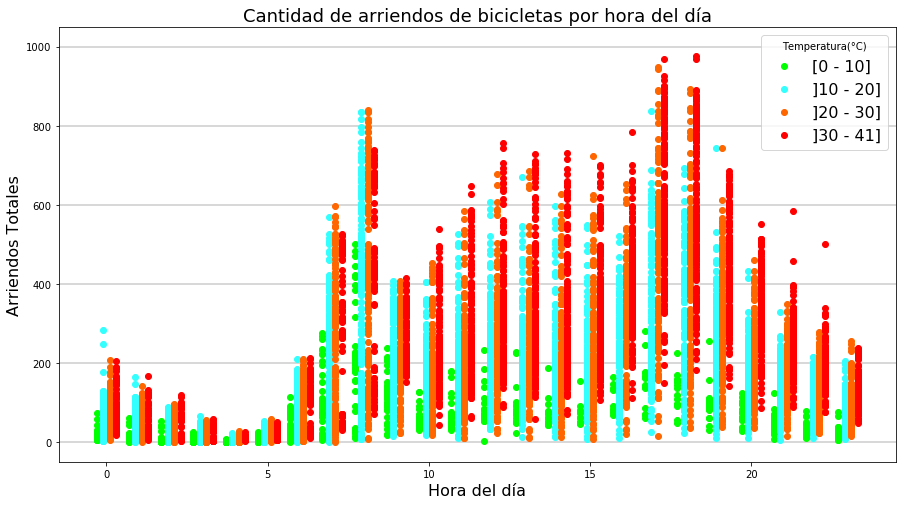

  Categoria  |   Maximo    |   Minimo    | Media Arit. |  Est. Dev.  | Frecuencia  
----------------------------------------------------------------------------------
  [0 - 10]   |     501     |      1      |   67.329    |   77.236    |     577     
  ]10 - 20]  |     837     |      1      |   140.04    |    142.5    |    4731     
  ]20 - 30]  |     948     |      1      |   179.41    |   170.57    |    3964     
  ]30 - 41]  |     977     |      2      |   291.73    |   201.07    |    3185     


In [32]:
plt.figure(figsize=(15, 8))
plt.xlabel("Hora del día", fontsize=16)
plt.ylabel("Arriendos Totales", fontsize=16)
for height in range(0,1200,200):
    plt.axhline(y=height, alpha=0.5, color=(0.6,0.6,0.6))

# Bicicletas con temperatura entre 0 y 10 grados
dflowh = df.loc[lambda df: df.atemp <= 10]
plt.plot(dflowh['hour']-0.3, dflowh['count'], 'o', color=(0,1,0), alpha=1, label="[0 - 10]")

# Bicicletas con temperatura entre 10 y 20 grados
dfmidh = df.loc[lambda df: (df.atemp > 10) & (df.temp <= 20)]
plt.plot(dfmidh['hour']-0.1, dfmidh['count'], 'o', color=(0.2,1,1), alpha=1, label="]10 - 20]")

# Bicicletas con temperatura entre 20 y 30 grados
dfhighh = df.loc[lambda df: (df.atemp > 20) & (df.atemp <= 30)]
plt.plot(dfhighh['hour']+0.1, dfhighh['count'], 'o', color=(1,0.4,0), alpha=1, label="]20 - 30]")

# Bicicletas con temperatura entre 30 y 41 grados
dfvhighh = df.loc[lambda df: (df.atemp > 30) & (df.atemp <= 41)]
plt.plot(dfvhighh['hour']+0.3, dfvhighh['count'], 'o', color=(1,0,0), alpha=1, label="]30 - 41]")

plt.title('Cantidad de arriendos de bicicletas por hora del día', fontsize=18)
plt.legend(fontsize=16, title='Temperatura(°C)')
plt.show()

print("{:^13}|{:^13}|{:^13}|{:^13}|{:^13}|{:^13}".format("Categoria", "Maximo", "Minimo", "Media Arit.", 
                                                         "Est. Dev.", "Frecuencia"))
print("-"*82)
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("[0 - 10]", np.max(dflowh['count']), 
                                                             np.min(dflowh['count']), 
                                                             np.mean(dflowh['count']), 
                                                             np.std(dflowh['count']), len(dflowh)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("]10 - 20]", np.max(dfmidh['count']), 
                                                             np.min(dfmidh['count']), 
                                                             np.mean(dfmidh['count']), 
                                                             np.std(dfmidh['count']), len(dfmidh)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("]20 - 30]", np.max(dfhighh['count']), 
                                                             np.min(dfhighh['count']), 
                                                             np.mean(dfhighh['count']), 
                                                             np.std(dfhighh['count']), len(dfhighh)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("]30 - 41]", np.max(dfvhighh['count']), 
                                                             np.min(dfvhighh['count']), 
                                                             np.mean(dfvhighh['count']), 
                                                             np.std(dfvhighh['count']), len(dfvhighh)))

En efecto, se observa una tendencia bastante similar a la del atributo *temp*, donde a mayor temperatura se tiene mayor arriendos de bicicletas.

Para analizar la relación entre *temp* y *atemp* más a fondo, se grafica la diferencia entre ambos atributos a lo largo del dataset. Se esperaría que la diferencia entre ambos valores no fuese muy pronunciada.

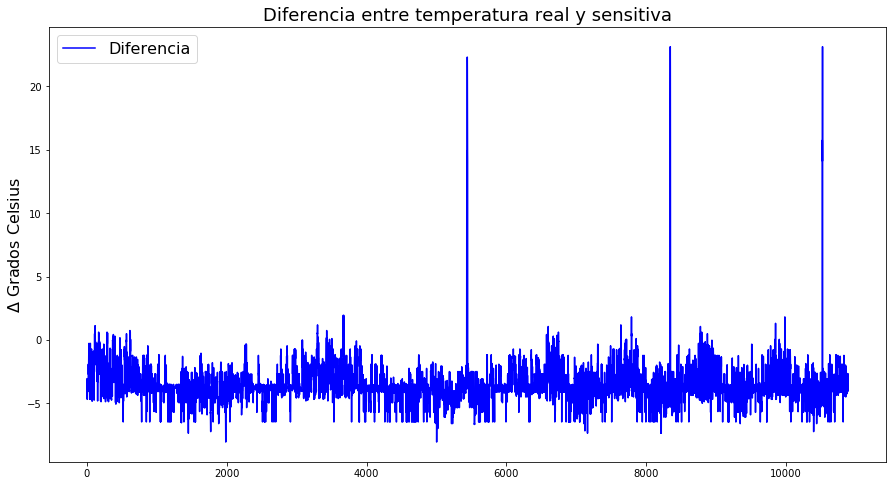

In [31]:
plt.figure(figsize=(15, 8))
plt.ylabel("$\Delta$ Grados Celsius", fontsize=16)

plt.plot(range(len(df['temp'])), df['temp']-df['atemp'], '-', color=(0,0,1), alpha=1, label="Diferencia")

plt.title('Diferencia entre temperatura real y sensitiva', fontsize=18)
plt.legend(fontsize=16)
plt.show()

Contrario a lo que se piensa, existen algunos casos donde la diferencia entre la temperatura "real" y la sensitiva difieren en hasta 20 $^\circ$C. Para estudiar de manera más detallada estos casos particulares se construye una tabla con los escenarios donde la diferencia exceda los 10 $^\circ$C, mostrando el valor de los atributos como humedad, clima y velocidad del viento.

In [37]:
def weather(code):
    if code == 1:
        return "Despejado"
    elif code == 2:
        return "Niebla"
    elif code == 3:
        return "Lluvia suave"
    elif code == 4:
        return "Lluvia fuerte / Nieve"

def wind(code):
    if code <= 24:
        return "Viento Leve"
    elif code > 24 and code <= 38:
        return "Viento Fuerte"
    elif code > 38 and code <= 54:
        return "Ventisca"
    elif code > 54:
        return "Tormenta"  

print("{:^58}".format("Temperatura"))
print("-"*74)
print("{:^12}|{:^10}|{:^11}|{:^11}|{:^13}|{:^13}".format("Diferencia", "Real", "Sensacion", "Humedad","Clima","Viento"))
print("-"*74)
for index, row in df.iterrows():
    diff = np.abs(row['temp']-row['atemp'])
    if(diff>10):
        print("{:^12.4}|{:^10.4}|{:^11}|{:^11}|{:^13}|{:^13}".format(diff, row['temp'], row['atemp'], 
                                                              row['humidity'], weather(int(row['weather'])), 
                                                                               wind(int(row['weather']))
                                                                                      ))

                       Temperatura                        
--------------------------------------------------------------------------
 Diferencia |   Real   | Sensacion |  Humedad  |    Clima    |   Viento    
--------------------------------------------------------------------------
   14.94    |  27.06   |   12.12   |    65     |  Despejado  | Viento Leve 
   14.94    |  27.06   |   12.12   |    61     |  Despejado  | Viento Leve 
   14.12    |  26.24   |   12.12   |    65     |  Despejado  | Viento Leve 
   14.12    |  26.24   |   12.12   |    73     |  Despejado  | Viento Leve 
    13.3    |  25.42   |   12.12   |    78     |  Despejado  | Viento Leve 
   15.76    |  27.88   |   12.12   |    65     |  Despejado  | Viento Leve 
   16.58    |   28.7   |   12.12   |    58     |  Despejado  | Viento Leve 
    21.5    |  33.62   |   12.12   |    41     |  Despejado  | Viento Leve 
   22.32    |  34.44   |   12.12   |    32     |   Niebla    | Viento Leve 
    21.5    |  33.62   |   12.1

Salta a la vista inmediatamente que en todos los casos anómalos se tiene una sensación térmica de $12.12 ^\circ$C. Esto hace pensar que las lecturas estén defectuosas, por lo que se definirá un dataset alternativo excluyendo estas filas.

In [38]:
dftrain2 = dftrain.copy()
dfval2 = dfval.copy()
dftest2 = dftest.copy()

dataframes = [dftrain2, dfval2, dftest2]
# Eliminar filas con mediciones de temperaturas incoherentes (atemp=12.12 de la lista anterior)
for dataframe in dataframes:
    dropped = 0
    for index, row in dataframe.iterrows():
        diff = np.abs(row['temp']-row['atemp'])
        if(diff>10):
            dataframe.drop(index, inplace=True)
            dropped+=1
            
ntrain2 = dftrain2.shape[0]
nval2 = dftrain2.shape[0] + dfval2.shape[0]

df2 = pd.concat([dftrain2, dfval2, dftest2])     

df2['hour'] = pd.to_datetime(df2['datetime']).apply(lambda x: x.strftime('%H'))
df2['hour'] = pd.to_numeric(df2['hour'])

## Humedad

Similar a la temperatura, se realizará un estudio definiendo cuatro clases, cada una conteniendo un rango de $25\%$ de humedad.

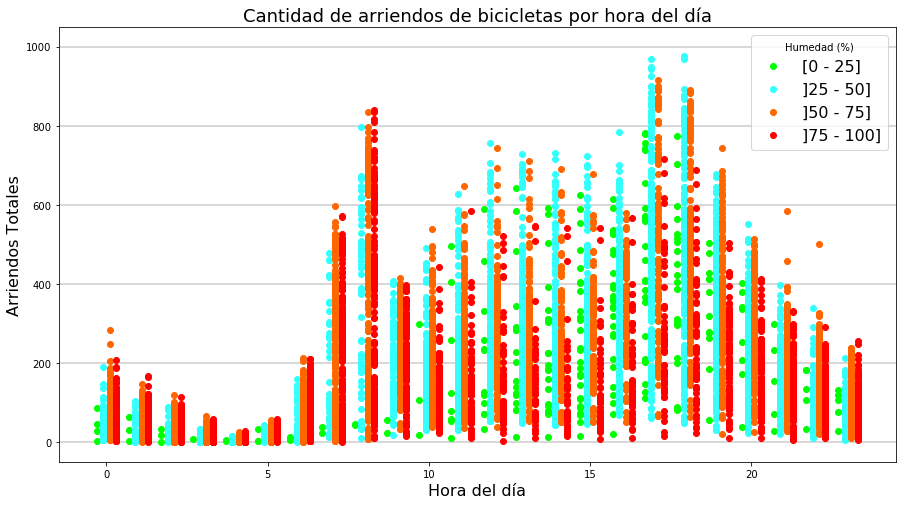

  Categoria  |   Maximo    |   Minimo    | Media Arit. |  Est. Dev.  | Frecuencia  
----------------------------------------------------------------------------------
  [0 - 25]   |     781     |      1      |   265.97    |   200.24    |     218     
  ]25 - 50]  |     977     |      1      |   258.52    |   190.22    |    3170     
  ]50 - 75]  |     917     |      1      |   191.17    |   180.21    |    4407     
 ]75 - 100]  |     839     |      1      |   118.26    |   137.67    |    3091     


In [29]:
plt.figure(figsize=(15, 8))
plt.xlabel("Hora del día", fontsize=16)
plt.ylabel("Arriendos Totales", fontsize=16)
for height in range(0,1200,200):
    plt.axhline(y=height, alpha=0.5, color=(0.6,0.6,0.6))

# Bicicletas con humedad leve
dflowhu = df.loc[lambda df: df.humidity <= 25]
plt.plot(dflowhu['hour']-0.3, dflowhu['count'], 'o', color=(0,1,0), alpha=1, label="[0 - 25]")

# Bicicletas con humedad media
dfmidhu = df.loc[lambda df: (df.humidity > 25) & (df.humidity <= 50)]
plt.plot(dfmidhu['hour']-0.1, dfmidhu['count'], 'o', color=(0.2,1,1), alpha=1, label="]25 - 50]")

# Bicicletas con humedad alta
dfhighhu = df.loc[lambda df: (df.humidity > 50) & (df.humidity <= 75)]
plt.plot(dfhighhu['hour']+0.1, dfhighhu['count'], 'o', color=(1,0.4,0), alpha=1, label="]50 - 75]")

# Bicicletas con humedad muy alta
dfvhighhu = df.loc[lambda df: (df.humidity > 75) & (df.humidity <= 100)]
plt.plot(dfvhighhu['hour']+0.3, dfvhighhu['count'], 'o', color=(1,0,0), alpha=1, label="]75 - 100]")

plt.title('Cantidad de arriendos de bicicletas por hora del día', fontsize=18)
plt.legend(fontsize=16, title='Humedad (%)')
plt.show()

print("{:^13}|{:^13}|{:^13}|{:^13}|{:^13}|{:^13}".format("Categoria", "Maximo", "Minimo", "Media Arit.",
                                                         "Est. Dev.", "Frecuencia"))
print("-"*82)
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("[0 - 25]", np.max(dflowhu['count']), 
                                                             np.min(dflowhu['count']),
                                                             np.mean(dflowhu['count']), 
                                                             np.std(dflowhu['count']), len(dflowhu)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("]25 - 50]", np.max(dfmidhu['count']), 
                                                             np.min(dfmidhu['count']), 
                                                             np.mean(dfmidhu['count']), 
                                                             np.std(dfmidhu['count']), len(dfmidhu)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("]50 - 75]", np.max(dfhighhu['count']), 
                                                             np.min(dfhighhu['count']),
                                                             np.mean(dfhighhu['count']), 
                                                             np.std(dfhighhu['count']), len(dfhighhu)))
print("{:^13}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("]75 - 100]", np.max(dfvhighhu['count']), 
                                                             np.min(dfvhighhu['count']),
                                                             np.mean(dfvhighhu['count']), 
                                                             np.std(dfvhighhu['count']), len(dfvhighhu)))

Se observa una tendencia a arrendar más bicicletas con un índice de humedad más bajo.

## Velocidad de Viento

Para estudiar el viento se utilizó la escala de [Beaufort].
[Beaufort]:https://es.wikipedia.org/wiki/Escala_de_Beaufort

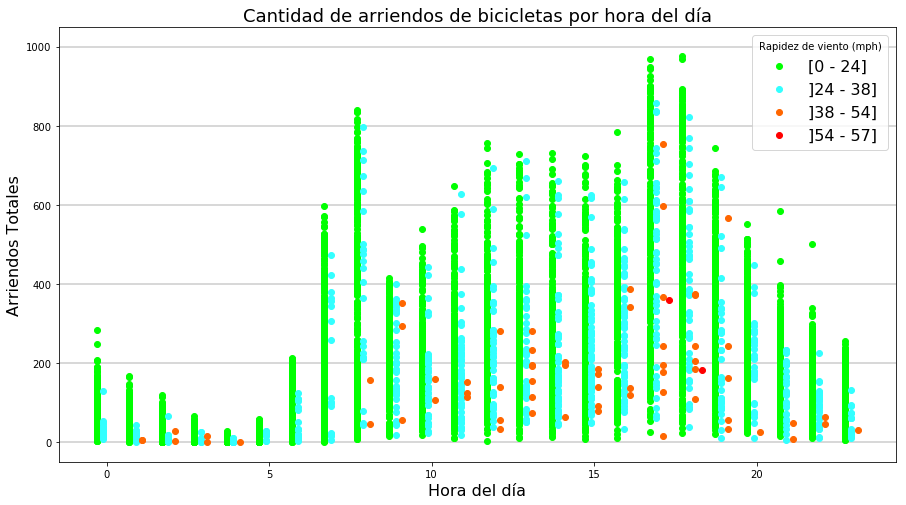

   Categoria   |   Maximo    |   Minimo    | Media Arit. |  Est. Dev.  | Frecuencia  
------------------------------------------------------------------------------------
  Viento leve  |     977     |      1      |   189.73    |   181.17    |    10037    
 Viento fuerte |     857     |      1      |   217.25    |   181.16    |     782     
   Ventisca    |     755     |      1      |    164.8    |   149.11    |     65      
   Tormenta    |     358     |     181     |    269.5    |    88.5     |      2      


In [11]:
plt.figure(figsize=(15, 8))
plt.xlabel("Hora del día", fontsize=16)
plt.ylabel("Arriendos Totales", fontsize=16)
for height in range(0,1200,200):
    plt.axhline(y=height, alpha=0.5, color=(0.6,0.6,0.6))

# Bicicletas con viento leve
dflowwin = df.loc[lambda df: df.windspeed <= 24]
plt.plot(dflowwin['hour']-0.3, dflowwin['count'], 'o', color=(0,1,0), alpha=1, label="[0 - 24]")

# Bicicletas con viento fuerte
dfhighwin = df.loc[lambda df: (df.windspeed > 24) & (df.windspeed <= 38)]
plt.plot(dfhighwin['hour']-0.1, dfhighwin['count'], 'o', color=(0.2,1,1), alpha=1, label="]24 - 38]")

# Bicicletas con vendaval
dfgalewin = df.loc[lambda df: (df.windspeed > 38) & (df.windspeed <= 54)]
plt.plot(dfgalewin['hour']+0.1, dfgalewin['count'], 'o', color=(1,0.4,0), alpha=1, label="]38 - 54]")

# Bicicletas con tormenta de viento
dfstrmwin = df.loc[lambda df: df.windspeed > 54]
plt.plot(dfstrmwin['hour']+0.3, dfstrmwin['count'], 'o', color=(1,0,0), alpha=1, label="]54 - 57]")

plt.title('Cantidad de arriendos de bicicletas por hora del día', fontsize=18)
plt.legend(fontsize=16, title='Rapidez de viento (mph)')
plt.show()

print("{:^15}|{:^13}|{:^13}|{:^13}|{:^13}|{:^13}".format("Categoria", "Maximo", "Minimo", "Media Arit.", 
                                                         "Est. Dev.", "Frecuencia"))
print("-"*84)
print("{:^15}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Viento leve", np.max(dflowwin['count']), 
                                                             np.min(dflowwin['count']), 
                                                             np.mean(dflowwin['count']), 
                                                             np.std(dflowwin['count']), len(dflowwin)))
print("{:^15}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Viento fuerte", np.max(dfhighwin['count']), 
                                                             np.min(dfhighwin['count']), 
                                                             np.mean(dfhighwin['count']), 
                                                             np.std(dfhighwin['count']), len(dfhighwin)))
print("{:^15}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Ventisca", np.max(dfgalewin['count']), 
                                                             np.min(dfgalewin['count']), 
                                                             np.mean(dfgalewin['count']), 
                                                             np.std(dfgalewin['count']), len(dfgalewin)))
print("{:^15}|{:^13}|{:^13}|{:^13.5}|{:^13.5}|{:^13}".format("Tormenta", np.max(dfstrmwin['count']), 
                                                             np.min(dfstrmwin['count']), 
                                                             np.mean(dfstrmwin['count']), 
                                                             np.std(dfstrmwin['count']), len(dfstrmwin)))

En este caso, destaca que la velocidad del viento se mantiene bastante constante ya que se tienen 10037 ocurrencias donde el viento es leve, versus ~900 con otros casos. Esto hace dificil establecer tendencias.

## B)

Se entrena un árbol de regresión estándar con el dataframe original establecido en el item anterior.

In [75]:
# Funcion de score de la competencia
def eval_bikemodel(y_predict,y_true,place):
    As=y_predict+1.0
    i=-1
    for a in As:
        i+=1
        if a<=0: 
            print(place,'a',i,a)
            As[i]=1
    Bs=y_true+1.0
    for b in Bs:
        if b<=0: 
            print(place,'b',b)
    diff = np.log(As) - np.log(Bs)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

# Funcion que recibe un modelo y datos, y entrega score obtenido 
# además de grafico comparativo de aproximacion versus datos reales
def model_score_and_plot(model, xtrain, ytrain, xval, yval, xtest, ytest, plot = True, fun=None):
    
    if fun == 'sqrt':
        score_test = model.score(xtest,np.sqrt(ytest))
    if fun == 'log':
        score_test = model.score(xtest,np.log(ytest))
    else:
        score_test = model.score(xtest,ytest)
        
    print("{:20} = {:<15.3}".format("SCORE TEST", score_test))

    Y_pred_train = model.predict(xtrain)
    Y_pred_val = model.predict(xval)
    Y_pred_test = model.predict(xtest)
    
    if fun == 'sqrt':
        kagg_train = eval_bikemodel(Y_pred_train**2,ytrain**2,"train")
        kagg_val = eval_bikemodel(Y_pred_val**2,yval,"val")
        Y_pred_test = Y_pred_test**2
        kagg_test = eval_bikemodel(Y_pred_test,ytest,"test")
        
    if fun == 'log':
        kagg_train = eval_bikemodel(np.exp(Y_pred_train),np.exp(ytrain),"train")
        kagg_val = eval_bikemodel(np.exp(Y_pred_val),yval,"val")
        Y_pred_test = np.exp(Y_pred_test)
        kagg_test = eval_bikemodel(Y_pred_test,ytest,"test")
        
    else:
        kagg_train = eval_bikemodel(Y_pred_train,ytrain,"train")
        kagg_val = eval_bikemodel(Y_pred_val,yval,"val")
        kagg_test = eval_bikemodel(Y_pred_test,ytest,"test")

    print("{:20} = {:<15.3}".format("KAGG EVAL TRAIN", kagg_train))
    print("{:20} = {:<15.3}".format("KAGG EVAL VALIDATION", kagg_val))
    print("{:20} = {:<15.3}".format("KAGG EVAL TEST", kagg_test))

    if plot:
        plt.figure(figsize=(15, 8))
        indentity = np.arange(0,1000)
        plt.plot(indentity,indentity,'-',color=(1,0.2,0.2),alpha=0.5)
        plt.plot(ytest,Y_pred_test,'.',color=(0.2,0.2,1))

        plt.show()

SCORE TEST           = 0.703          
KAGG EVAL TRAIN      = 0.0285         
KAGG EVAL VALIDATION = 0.555          
KAGG EVAL TEST       = 0.574          


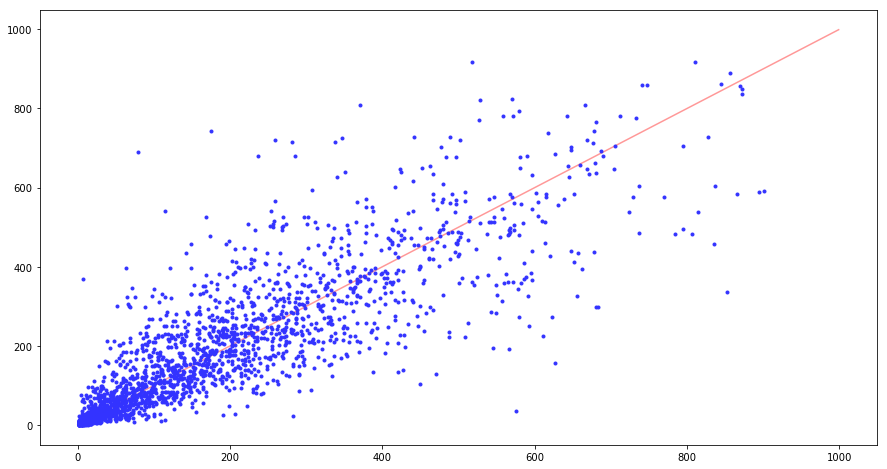

In [56]:
X_cols = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour']

Xdf=df.loc[:, X_cols]
Ydf=df.loc[:,'count']

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)

model_score_and_plot(model, X_train, Y_train, X_val, Y_val, X_test, Y_test)

Se tiene que el árbol obtuvo un puntaje de $0.574$ respecto del conjunto de test.

Ahora, se realizará la misma actividad con el dataframe que obvia las filas con anomalías en las lecturas de temperatura.

SCORE TEST           = 0.697          
KAGG EVAL TRAIN      = 0.0285         
KAGG EVAL VALIDATION = 0.554          
KAGG EVAL TEST       = 0.568          


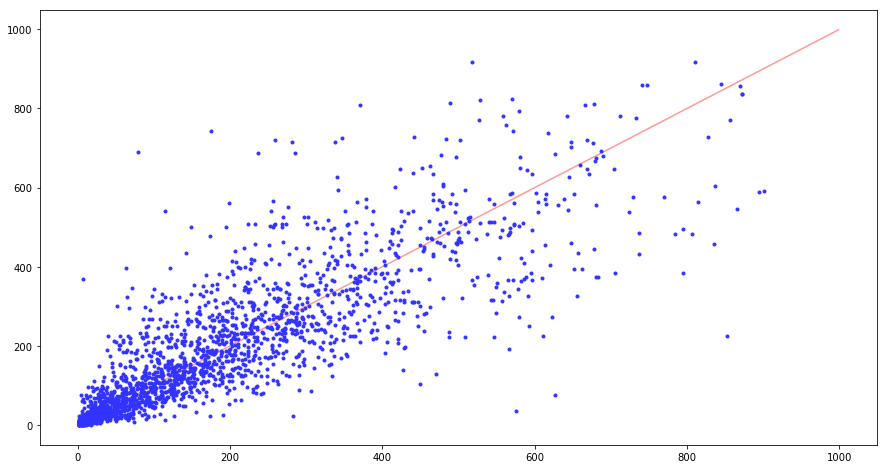

In [76]:
Xdf2=df2.loc[:, X_cols]
Ydf2=df2.loc[:,'count']

X2_train = Xdf2[0:ntrain2].values
X2_val = Xdf2[ntrain2:nval2].values
X2_test = Xdf2[nval2:].values
Y2_train = Ydf2[0:ntrain2].values
Y2_val = Ydf2[ntrain2:nval2].values
Y2_test = Ydf2[nval2:].values

model = Tree(random_state=0)
model.fit(X2_train,Y2_train)

model_score_and_plot(model, X2_train, Y2_train, X2_val, Y2_val, X2_test, Y2_test)

En este caso, se tiene una estimación algo más ajustada con un score de $0.568$ sobre el conjunto de test.

Desde este punto en adelante se utilizará este dataframe para las actividades.

In [61]:
# Se sobreescribe dataframe original con dataframe sin anomalias en temperaturas

Xdf=Xdf2
Ydf=Ydf2

X_train = X2_train
X_val = X2_val
X_test = X2_test
Y_train = Y2_train
Y_val = Y2_val
Y_test = Y2_test

A continuación se grafica la importancia de los atributos según el árbol de regresión. Esta medida corresponde a la suma de la **reducción** de error de clasificación en cada nodo (más es mejor).

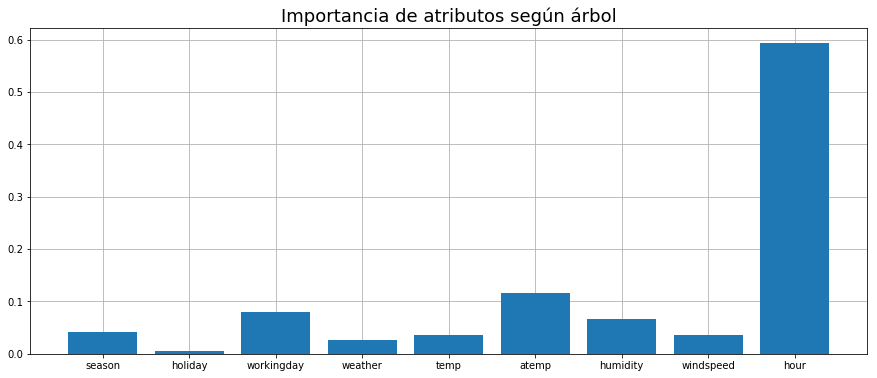

In [44]:
importance = model.feature_importances_
x_ticks = np.arange(len(importance))

fig, ax = plt.subplots(figsize=(15,6))

plt.bar(x_ticks, importance, alpha=1)

plt.xticks(x_ticks, X_cols)
plt.grid(True)
ax.set_axisbelow(True)
plt.title('Importancia de atributos según árbol', fontsize=18)
plt.show()

No es sorpresa que el atributo más determinante a la hora de estimar la cantidad de arriendos sea la hora. 

## C)

Para mejorar el modelo anterior se limitará la profundidad del árbol. Ya que una profundidad excesiva tiende a producir *overfitting*. Para esto se definirá una función que encuentra la profundidad del árbol que minimiza el *__kaggle score__* de validación.

In [79]:
# Funcion que dado un conjunto de entrenamiento y validacion encuentra la profundidad 
# que minimiza el error de validacion

def opt_tree_depth(xtrain, ytrain, xval, yval, m_depth=50, fun=None):
    kagg_val_list = []
    kagg_train_list = []
    
    for depth in range(2,m_depth+1):
        model = Tree(random_state=0, max_depth = depth)
        model.fit(xtrain, ytrain)
        Y_pred_train = model.predict(xtrain)
        Y_pred_val = model.predict(xval)
        if fun == 'sqrt':
            kagg_train = eval_bikemodel(Y_pred_train**2, ytrain**2, "train")
            kagg_val = eval_bikemodel(Y_pred_val**2, yval, "val") 
        elif fun == 'log':
            kagg_train = eval_bikemodel(np.exp(Y_pred_train), np.exp(ytrain), "train")
            kagg_val = eval_bikemodel(np.exp(Y_pred_val), yval, "val") 
        else:
            kagg_train = eval_bikemodel(Y_pred_train, ytrain, "train")
            kagg_val = eval_bikemodel(Y_pred_val, yval, "val")
        kagg_train_list.append(kagg_train)
        kagg_val_list.append(kagg_val)
    
    plt.figure(figsize=(15, 8))
    plt.plot(range(2, m_depth+1), kagg_train_list, label = "Entrenamiento")
    plt.plot(range(2, m_depth+1), kagg_val_list, label = "Validación")
    plt.ylabel("Kaggle Score", fontsize=16)
    plt.xlabel("Profundidad del arbol", fontsize=16)
    plt.grid(True)
    plt.xticks(range(2,m_depth+1,2))
    plt.yticks(np.arange(0,1.05,0.05))
    plt.title('Kaggle score de entrenamiento y validación', fontsize=18)
    plt.legend(fontsize=16, title='Kaggle Score')
    plt.show()
    
    min_kagg_val = min(kagg_val_list)
    print("{:18} = {:<15.3}".format("MIN KAGG VAL", min_kagg_val))
    opt_depth = kagg_val_list.index(min_kagg_val) + 2
    print("{:18} = {:<15}".format("OPTIMAL TREE DEPTH", opt_depth))
    
    return opt_depth

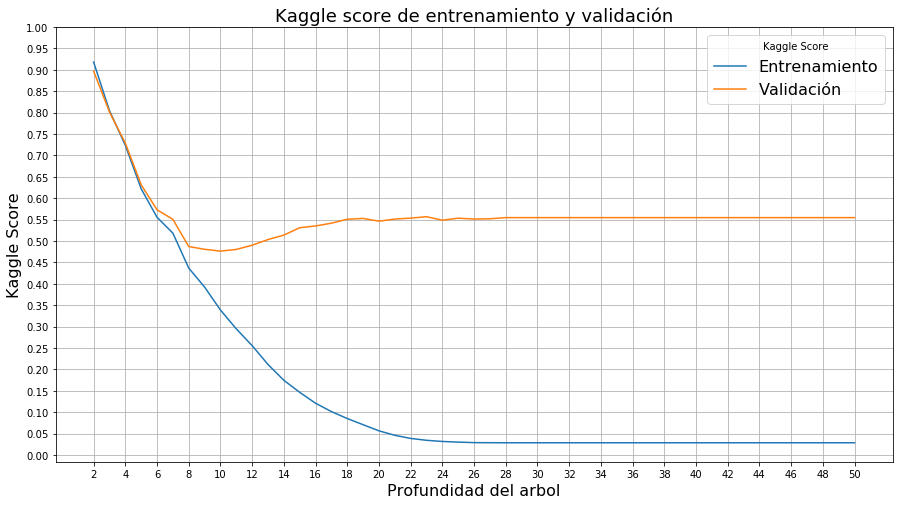

MIN KAGG VAL       = 0.476          
OPTIMAL TREE DEPTH = 10             


In [59]:
opt_depth = opt_tree_depth(X_train, Y_train, X_val, Y_val)

Se tiene que la profundidad óptima para el modelo corresponde a $10$.

Entrenando el modelo y estimando el conjunto de test, obtenemos:

SCORE TEST           = 0.771          
KAGG EVAL TRAIN      = 0.339          
KAGG EVAL VALIDATION = 0.479          
KAGG EVAL TEST       = 0.517          


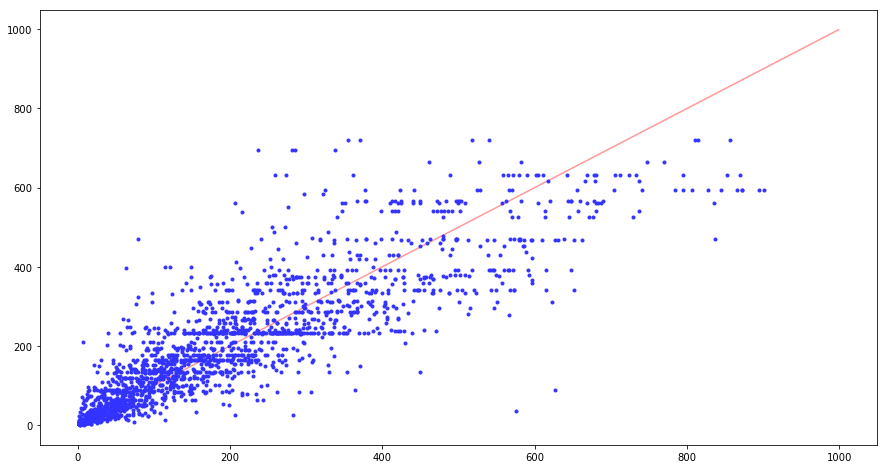

In [53]:
model = Tree(random_state=0, max_depth=opt_depth)
model.fit(X_train,Y_train)
model_score_and_plot(model, X_train, Y_train, X_val, Y_val, X_test, Y_test)

Con un árbol de profundidad 10, obtenemos un score de $0.517$ respecto al conjunto de test. Esto significa una mejora leve respecto al modelo anterior.

## D)

Realizando primero la modificación de incluir el día de la medición como atributo del dataframe, obtenemos:

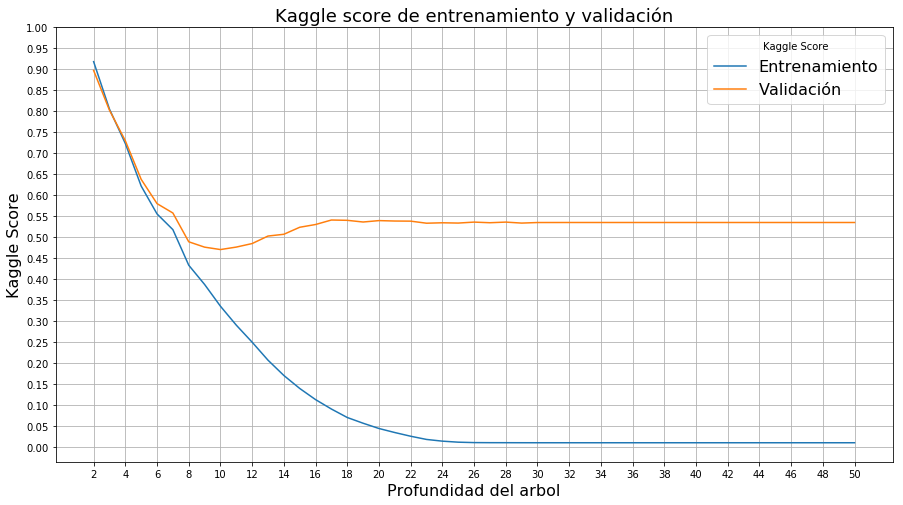

MIN KAGG VAL       = 0.47           
OPTIMAL TREE DEPTH = 10             
SCORE TEST           = 0.784          
KAGG EVAL TRAIN      = 0.336          
KAGG EVAL VALIDATION = 0.47           
KAGG EVAL TEST       = 0.505          


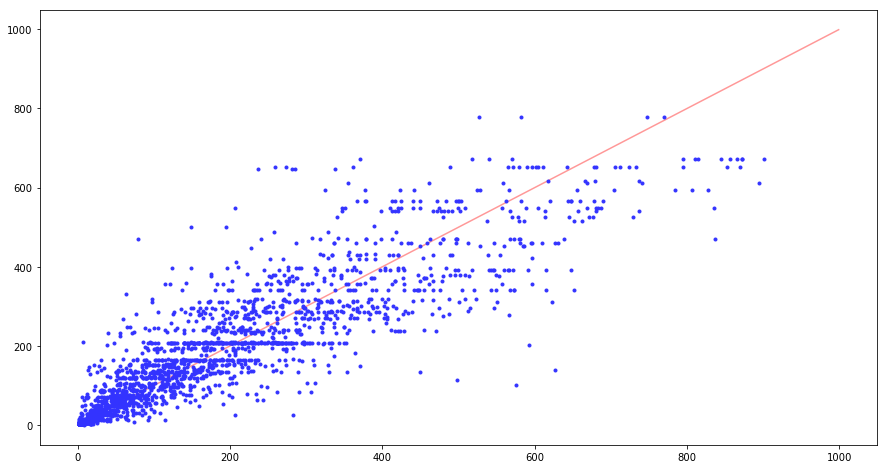

In [87]:

# Extraccion de informacion acerca del dia
df2['cday'] = pd.to_datetime(df2['datetime']).dt.dayofweek #0:lunes,6:domingo
df2['cday'] = pd.to_numeric(df2['cday'])

Xdf=df2.loc[:,['season', 'holiday','workingday', 'temp', 'atemp', 'weather','humidity', 'windspeed', 'hour',
               'cday']]

Ydf=df2.loc[:,'count']

X_train = Xdf[0:ntrain2].values
X_val = Xdf[ntrain2:nval2].values
X_test = Xdf[nval2:].values
Y_train = Ydf[0:ntrain2].values
Y_val = Ydf[ntrain2:nval2].values
Y_test = Ydf[nval2:].values

opt_depth = opt_tree_depth(X_train, Y_train, X_val, Y_val)

model = Tree(random_state=0, max_depth=opt_depth)
model.fit(X_train,Y_train)

model_score_and_plot(model, X_train, Y_train, X_val, Y_val, X_test, Y_test)

Lo que nuevamente corresponde a una mejora leve del modelo.

Luego, se tomará en consideración el histograma presentado en el item A), donde se observaba que los valores de la variable objetivo *count* presentaban un sesgo hacia los valores bajos. Para mejorar esta situación se escalarán los valores de la variable objetivo utilizando la función raíz cuadrada.

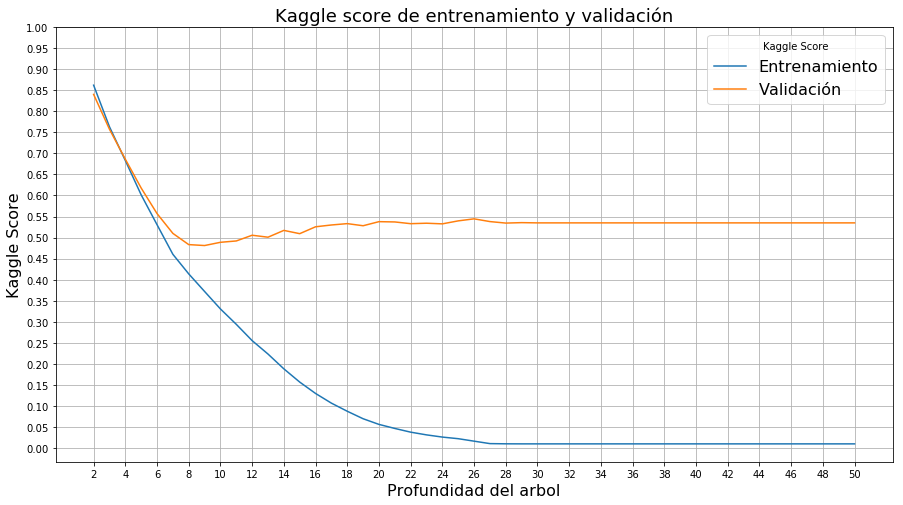

MIN KAGG VAL       = 0.481          
OPTIMAL TREE DEPTH = 9              
SCORE TEST           = -0.899         
KAGG EVAL TRAIN      = 0.168          
KAGG EVAL VALIDATION = 2.38           
KAGG EVAL TEST       = 0.51           


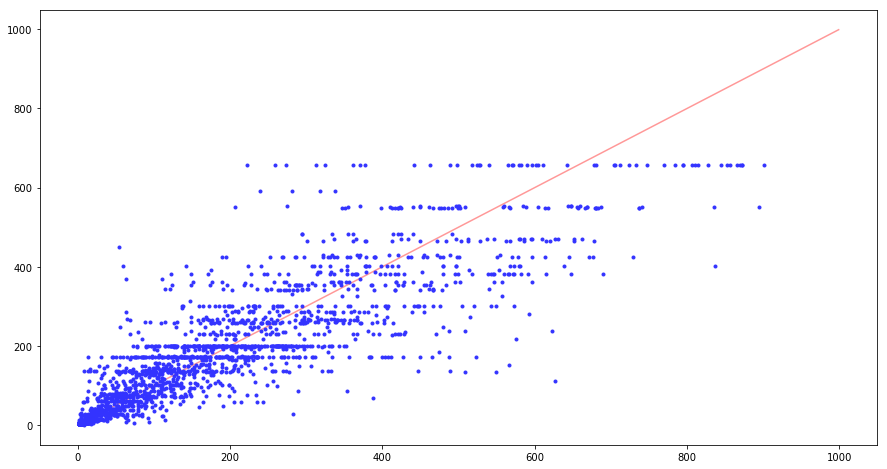

In [88]:
Y_train_raiz = np.sqrt(Y_train)

opt_depth = opt_tree_depth(X_train, Y_train_raiz, X_val, Y_val, fun='sqrt')

model = Tree(random_state=0, max_depth=opt_depth)
model.fit(X_train,Y_train_raiz)

model_score_and_plot(model, X_train, Y_train_raiz, X_val, Y_val, X_test, Y_test, fun='sqrt')

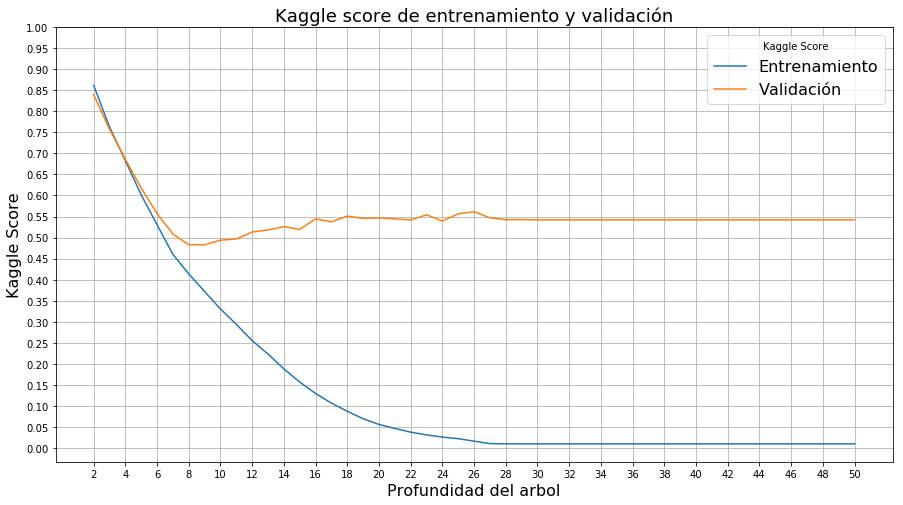

MIN KAGG VAL       = 0.483          
OPTIMAL TREE DEPTH = 9              
SCORE TEST           = -0.899         
KAGG EVAL TRAIN      = 0.168          
KAGG EVAL VALIDATION = 2.38           
KAGG EVAL TEST       = 0.514          


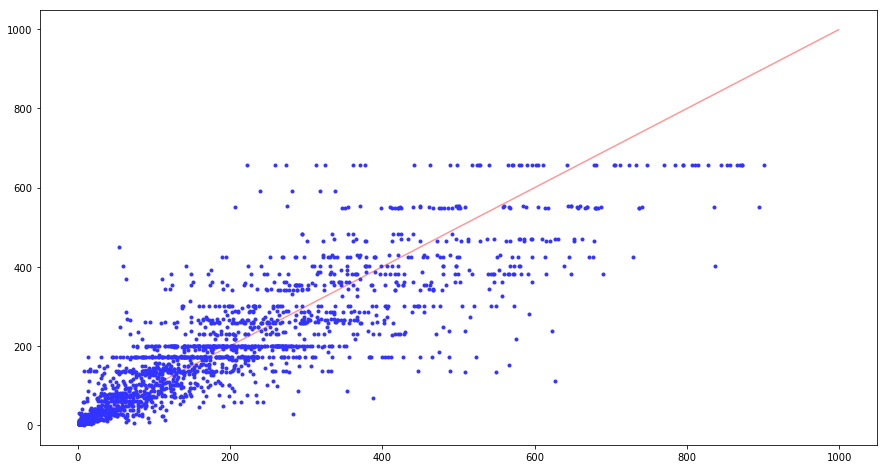

In [89]:
scalerX = StandardScaler()
X_train_S = scalerX.fit_transform(X_train)
X_val_S = scalerX.fit_transform(X_val)
X_test_S = scalerX.transform(X_test)

opt_depth = opt_tree_depth(X_train_S, Y_train_raiz, X_val_S, Y_val, fun='sqrt')

model = Tree(random_state=0, max_depth=opt_depth)
model.fit(X_train_S,Y_train_raiz)

model_score_and_plot(model, X_train_S, Y_train_raiz, X_val_S, Y_val, X_test_S, Y_test, fun='sqrt')

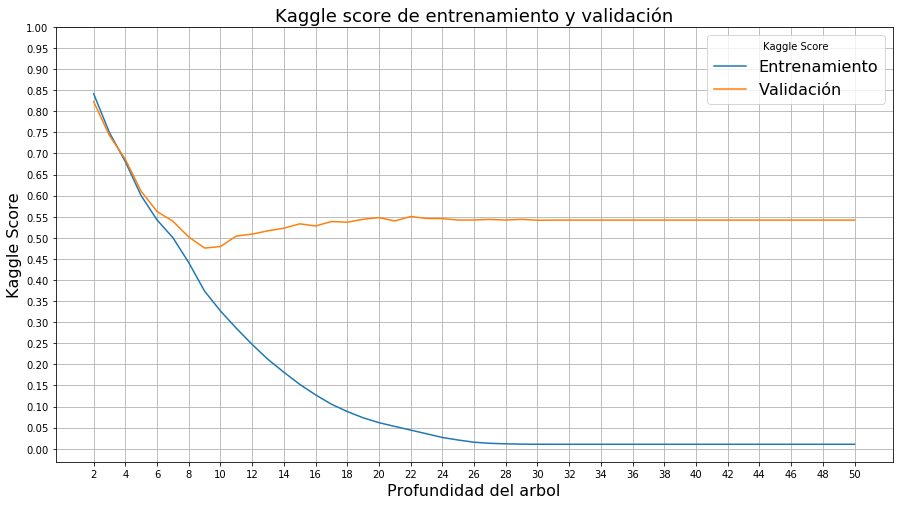

MIN KAGG VAL       = 0.476          
OPTIMAL TREE DEPTH = 9              
SCORE TEST           = 0.858          
KAGG EVAL TRAIN      = 0.374          
KAGG EVAL VALIDATION = 0.476          
KAGG EVAL TEST       = 0.521          


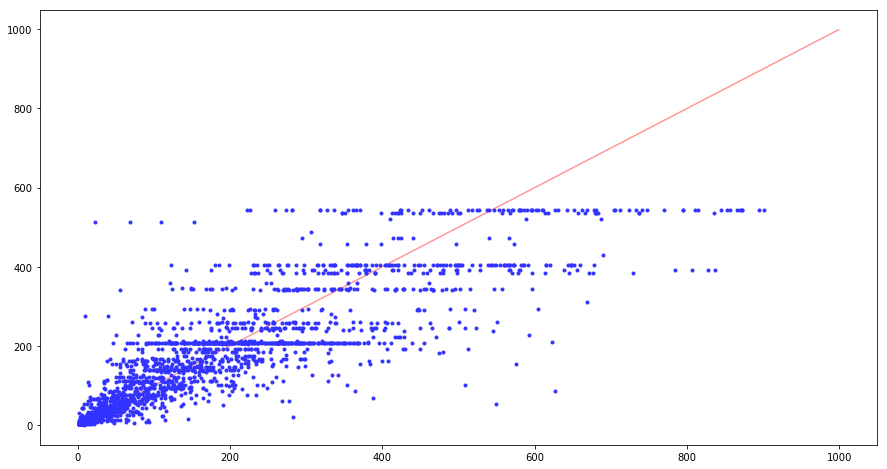

In [93]:
Y_train_log = np.log(Y_train)

opt_depth = opt_tree_depth(X_train, Y_train_log, X_val, Y_val, fun='log')

model = Tree(random_state=0, max_depth=opt_depth)
model.fit(X_train,Y_train_log)

model_score_and_plot(model, X_train, Y_train_log, X_val, Y_val, X_test, Y_test, fun='log')

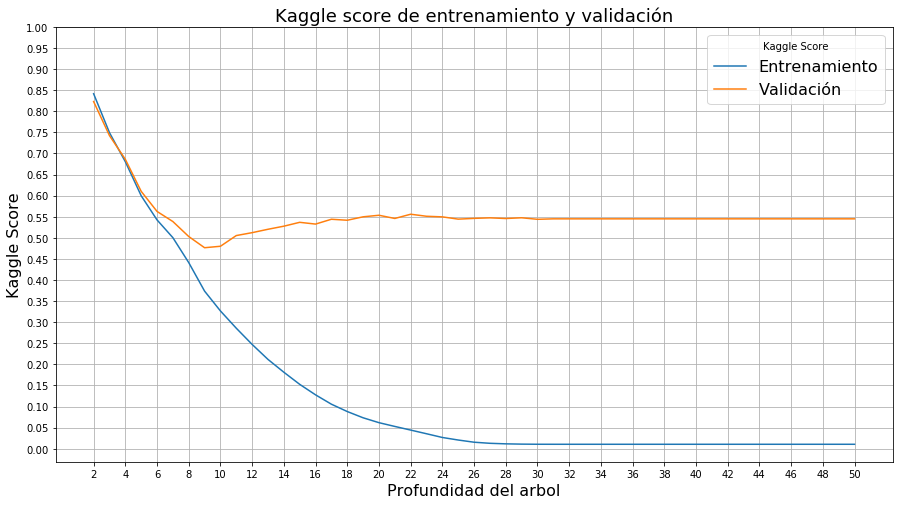

MIN KAGG VAL       = 0.477          
OPTIMAL TREE DEPTH = 9              
SCORE TEST           = 0.858          
KAGG EVAL TRAIN      = 0.374          
KAGG EVAL VALIDATION = 0.477          
KAGG EVAL TEST       = 0.521          


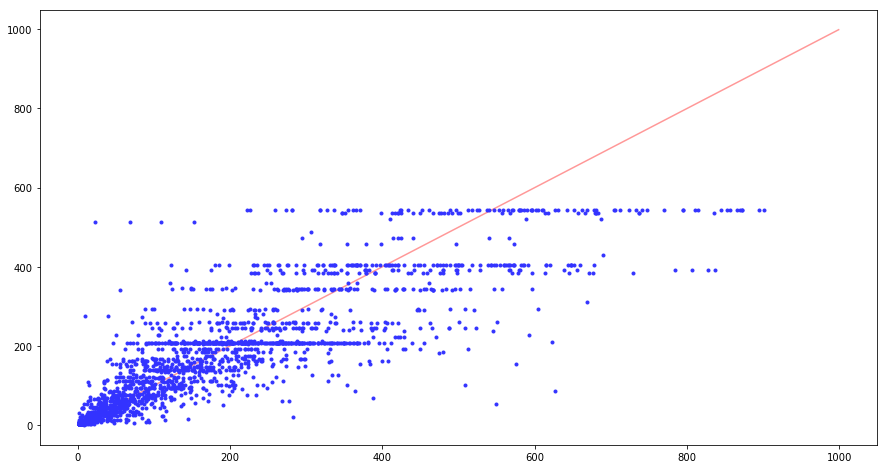

In [92]:
opt_depth = opt_tree_depth(X_train_S, Y_train_log, X_val_S, Y_val, fun='log')

model = Tree(random_state=0, max_depth=opt_depth)
model.fit(X_train_S,Y_train_log)

model_score_and_plot(model, X_train_S, Y_train_log, X_val_S, Y_val, X_test_S, Y_test, fun='log')

In [94]:
normalizerX = Normalizer()
X_train_N = normalizerX.transform(X_train)
X_val_N = normalizerX.transform(X_val)
X_test_N = normalizerX.transform(X_test)

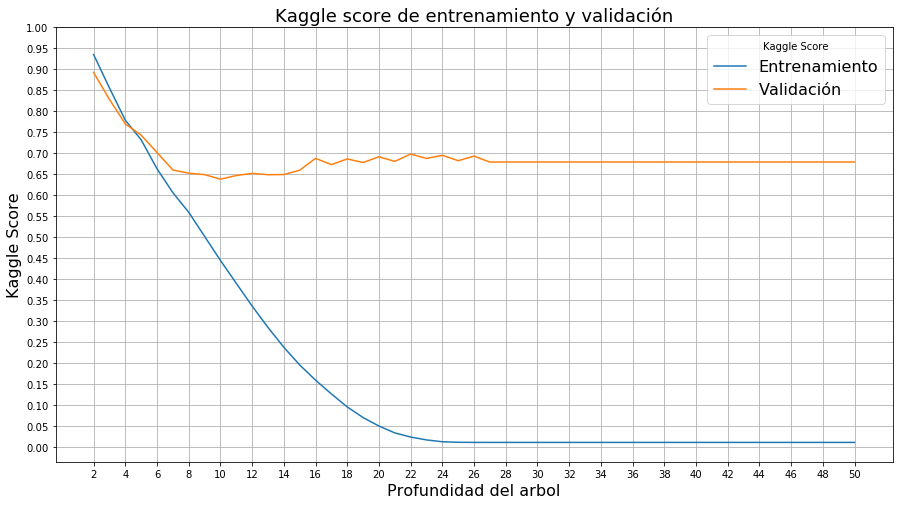

MIN KAGG VAL       = 0.637          
OPTIMAL TREE DEPTH = 10             
SCORE TEST           = -0.909         
KAGG EVAL TRAIN      = 0.202          
KAGG EVAL VALIDATION = 2.4            
KAGG EVAL TEST       = 0.69           


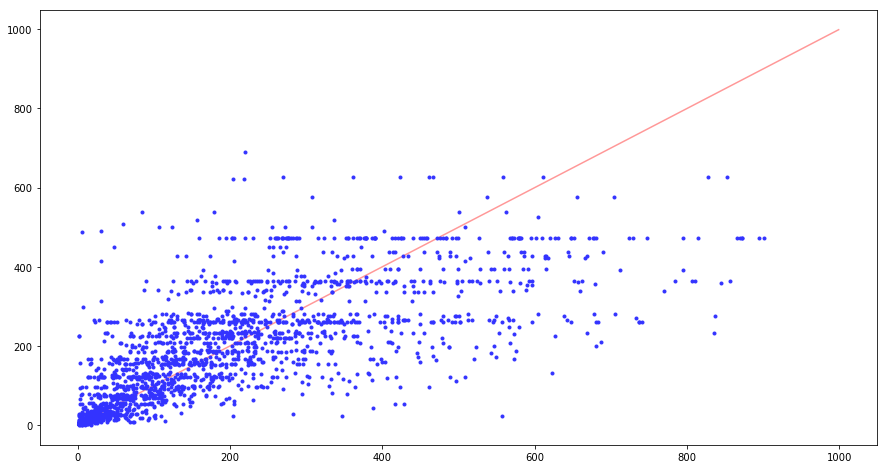

In [98]:
opt_depth = opt_tree_depth(X_train_N, Y_train_raiz, X_val_N, Y_val, fun='sqrt')

model = Tree(random_state=0, max_depth=opt_depth)
model.fit(X_train_N,Y_train_raiz)

model_score_and_plot(model, X_train_N, Y_train_raiz, X_val_N, Y_val, X_test_N, Y_test, fun='sqrt')

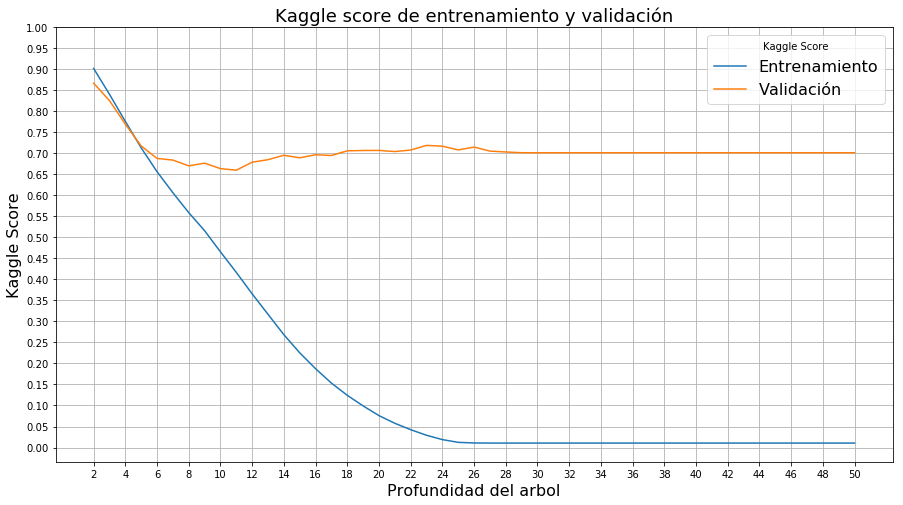

MIN KAGG VAL       = 0.659          
OPTIMAL TREE DEPTH = 11             
SCORE TEST           = 0.733          
KAGG EVAL TRAIN      = 0.416          
KAGG EVAL VALIDATION = 0.659          
KAGG EVAL TEST       = 0.711          


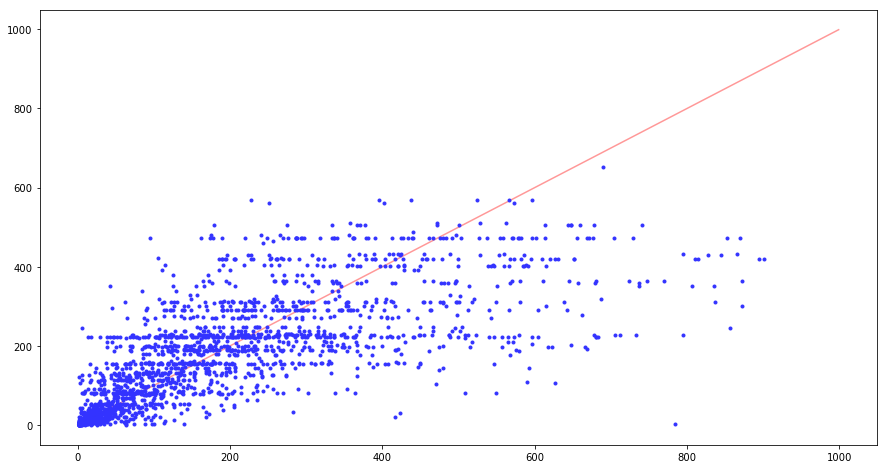

In [95]:
opt_depth = opt_tree_depth(X_train_N, Y_train_log, X_val_N, Y_val, fun='log')

model = Tree(random_state=0, max_depth=opt_depth)
model.fit(X_train_N,Y_train_log)

model_score_and_plot(model, X_train_N, Y_train_log, X_val_N, Y_val, X_test_N, Y_test, fun='log')

# E)

SCORE TEST           = -0.906         
KAGG EVAL TRAIN      = 0.178          
KAGG EVAL VALIDATION = 2.4            
KAGG EVAL TEST       = 0.46           


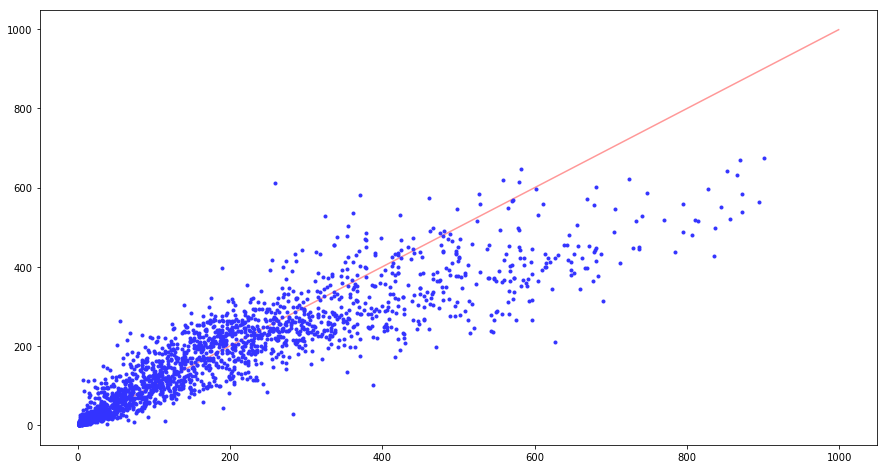

In [103]:
#load dataframes as before ...
df = pd.concat([dftrain2,dfval2,dftest2])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.loc[:,['season','holiday','workingday','weather','temp','atemp',
'humidity','windspeed','hour','cday']]
#PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])
Ydf=df.loc[:,'count']

X_train = Xdf[0:ntrain2].values
X_val = Xdf[ntrain2:nval2].values
X_test = Xdf[nval2:].values
Y_train = Ydf[0:ntrain2].values
Y_val = Ydf[ntrain2:nval2].values
Y_test = Ydf[nval2:].values

X_train_S = scalerX.fit_transform(X_train)
X_val_S = scalerX.fit_transform(X_val)
X_test_S = scalerX.transform(X_test)

model = SVR()
model.fit(X_train_S,Y_train_raiz)


model_score_and_plot(model, X_train_S, Y_train_raiz, X_val_S, Y_val, X_test_S, Y_test, fun='sqrt')

# F)

SCORE TEST           = -0.901         
KAGG EVAL TRAIN      = 0.163          
KAGG EVAL VALIDATION = 2.39           
KAGG EVAL TEST       = 0.447          


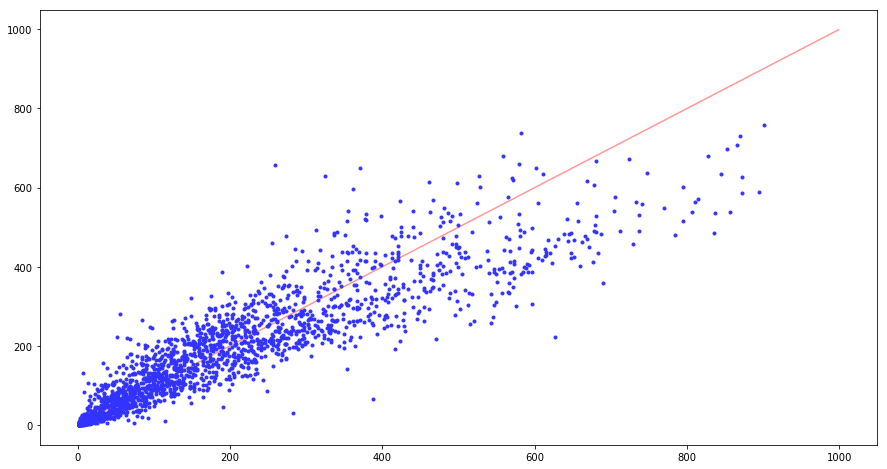

In [104]:
epsilons = [2**x for x in range(-2,3,1)]
kagg_val_list = []
kagg_train_list = []

model = SVR(C=3, epsilon=1, kernel='rbf')
model.fit(X_train_S,Y_train_raiz)

model_score_and_plot(model, X_train_S, Y_train_raiz, X_val_S, Y_val, X_test_S, Y_test, fun='sqrt')

# G)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    model =
    #define your model
    model.fit(Xm[train], ym[train])
    yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
    mse_cv += score_fold
mse_cv = mse_cv / 10

# H)

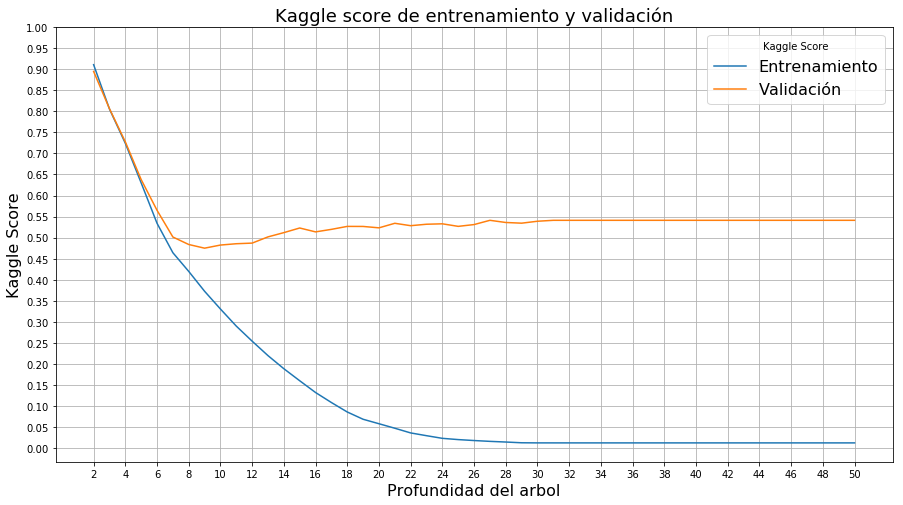

MIN KAGG VAL = 0.475          
TREE DEPTH   = 9              
SCORE TEST           = 0.781          
KAGG EVAL TRAIN      = 0.373          
KAGG EVAL VALIDATION = 0.475          
KAGG EVAL TEST       = 0.5            


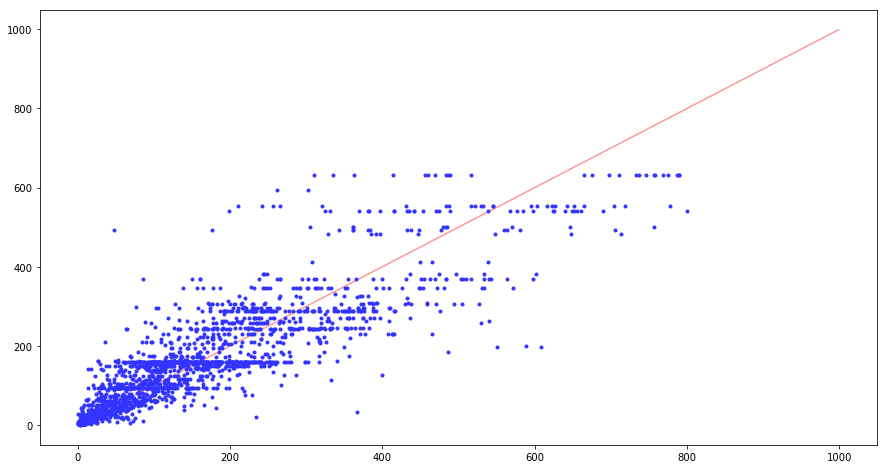

In [36]:
Yr=df.loc[:,'registered']

Xdf=df.loc[:,['season', 'holiday','workingday', 'temp', 'atemp', 'weather','humidity', 'windspeed', 'hour',
               'cday']]

X_train = Xdf[0:ntrain2].values
X_val = Xdf[ntrain2:nval2].values
X_test = Xdf[nval2:].values
Y_train_r = Yr[0:ntrain2].values
Y_val_r = Yr[ntrain2:nval2].values
Y_test_r = Yr[nval2:].values

opt_depth = opt_tree_depth(X_train, Y_train_r, X_val, Y_val_r)

model = Tree(random_state=0, max_depth=opt_depth)
model.fit(X_train,Y_train_r)

model_score_and_plot(model, X_train, Y_train_r, X_val, Y_val_r, X_test, Y_test_r)

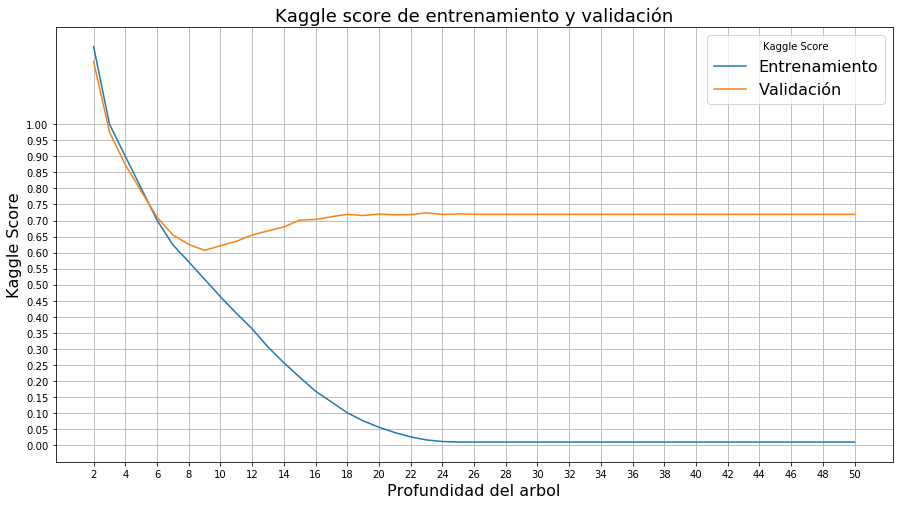

MIN KAGG VAL = 0.607          
TREE DEPTH   = 9              
SCORE TEST           = 0.773          
KAGG EVAL TRAIN      = 0.517          
KAGG EVAL VALIDATION = 0.607          
KAGG EVAL TEST       = 0.643          


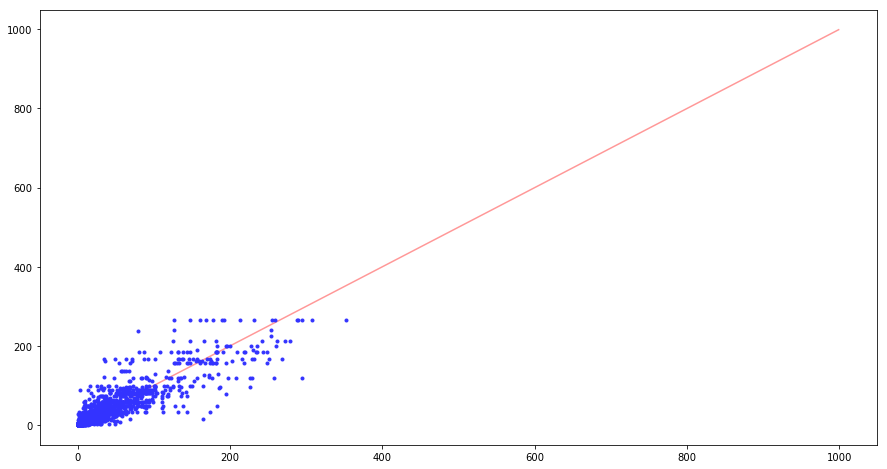

In [37]:
Yc=df.loc[:, 'casual']

Xdf=df.loc[:, ['season', 'holiday','workingday', 'temp', 'atemp', 'weather','humidity', 'windspeed', 'hour',
               'cday']]

X_train = Xdf[0:ntrain2].values
X_val = Xdf[ntrain2:nval2].values
X_test = Xdf[nval2:].values
Y_train_c = Yc[0:ntrain2].values
Y_val_c = Yc[ntrain2:nval2].values
Y_test_c = Yc[nval2:].values

opt_depth = opt_tree_depth(X_train, Y_train_c, X_val, Y_val_c)

model = Tree(random_state=0, max_depth=opt_depth)
model.fit(X_train,Y_train_c)

model_score_and_plot(model, X_train, Y_train_c, X_val, Y_val_c, X_test, Y_test_c)

# I)

SCORE TEST           = 0.828          
KAGG EVAL TRAIN      = 0.334          
KAGG EVAL VALIDATION = 0.423          
KAGG EVAL TEST       = 0.464          


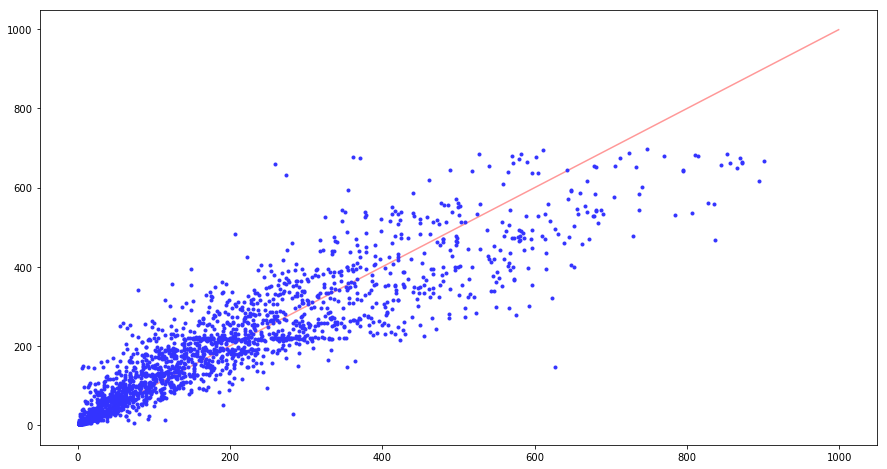

In [62]:
from sklearn.ensemble import RandomForestRegressor


def opt_n_estimators(xtrain, ytrain, xval, yval, m_n_est, m_depth=10, fun=None):
    kagg_val_list = []
    kagg_train_list = []
    
    for n_est in range(1,m_n_est+1):
        model = RandomForestRegressor(n_estimators=n_est, max_depth=m_depth, random_state=0)
        model.fit(xtrain, ytrain)
        Y_pred_train = model.predict(xtrain)
        Y_pred_val = model.predict(xval)
        kagg_train = eval_bikemodel(Y_pred_train, ytrain, "train")
        kagg_val = eval_bikemodel(Y_pred_val, yval, "val")
        kagg_train_list.append(kagg_train)
        kagg_val_list.append(kagg_val)
    
    plt.figure(figsize=(15, 8))
    plt.plot(range(1, m_n_est+1), kagg_train_list, label = "Entrenamiento")
    plt.plot(range(1, m_n_est+1), kagg_val_list, label = "Validación")
    plt.ylabel("Kaggle Score", fontsize=16)
    plt.xlabel("Numero de estimadores", fontsize=16)
    plt.grid(True)
    plt.xticks(range(1,m_n_est+1,2))
    plt.yticks(np.arange(0,1.05,0.05))
    plt.title('Kaggle score de entrenamiento y validación', fontsize=18)
    plt.legend(fontsize=16, title='Kaggle Score')
    plt.show()
    
    min_kagg_val = min(kagg_val_list)
    print("{:12} = {:<15.3}".format("MIN KAGG VAL", min_kagg_val))
    opt_est = kagg_val_list.index(min_kagg_val) + 2
    print("{:12} = {:<15}".format("N ESTIMATORS", opt_est))
    
    return opt_est

# opt_n_est = opt_n_estimators(X_train, Y_train, X_val, Y_val, 100)
# El optimo con 100 son 83 estimadores


model = RandomForestRegressor(n_estimators=83,max_depth=10,random_state=0)
model.fit(X_train, Y_train)
model_score_and_plot(model, X_train, Y_train, X_val, Y_val, X_test, Y_test)